<a href="https://colab.research.google.com/github/Farhanmian0011/Edtech/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Dummy data: House Size (sq ft), Bedrooms, Expensive (1) or Cheap (0)
data = {
    'Size': [800, 950, 1100, 1200, 1300, 1500, 1700, 1800, 2000, 2200],
    'Bedrooms': [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    'PriceClass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0: Cheap, 1: Expensive
}

df = pd.DataFrame(data)
print("House Price Classification Dataset:")
print(df)
print("\nDataset Info:")
print("- Size: House size in square feet")
print("- Bedrooms: Number of bedrooms")
print("- PriceClass: 0 = Cheap, 1 = Expensive")


House Price Classification Dataset:
   Size  Bedrooms  PriceClass
0   800         2           0
1   950         2           0
2  1100         3           0
3  1200         3           0
4  1300         3           1
5  1500         4           1
6  1700         4           1
7  1800         4           1
8  2000         5           1
9  2200         5           1

Dataset Info:
- Size: House size in square feet
- Bedrooms: Number of bedrooms
- PriceClass: 0 = Cheap, 1 = Expensive


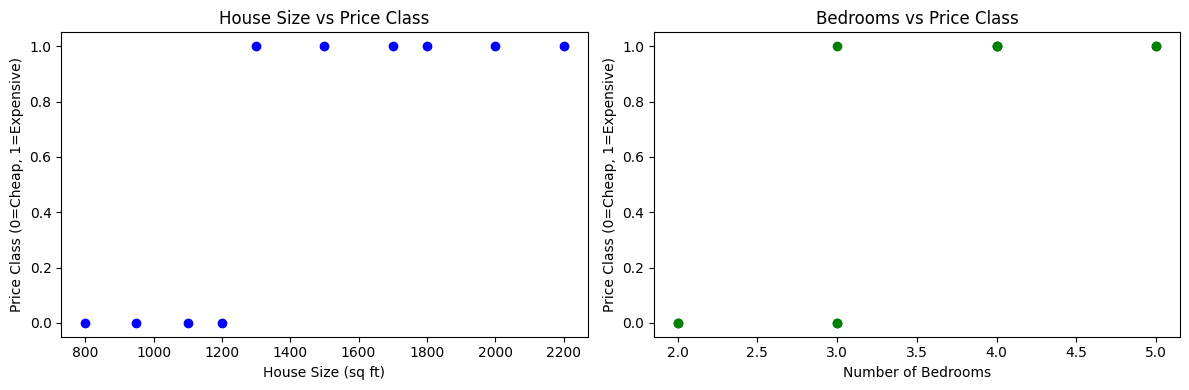

In [3]:
# Plot Size vs Price Class
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['Size'], df['PriceClass'], color='blue')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price Class (0=Cheap, 1=Expensive)')
plt.title('House Size vs Price Class')

plt.subplot(1, 2, 2)
plt.scatter(df['Bedrooms'], df['PriceClass'], color='green')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price Class (0=Cheap, 1=Expensive)')
plt.title('Bedrooms vs Price Class')

plt.tight_layout()
plt.show()


In [4]:
# Prepare features and target
X = df[['Size', 'Bedrooms']]
y = df['PriceClass']

# Create and train the model
model = LogisticRegression()
model.fit(X, y)

print("Model trained successfully!")


Model trained successfully!


In [5]:
# Predict on the training data
predictions = model.predict(X)
print("Predictions vs Actual:")
print(pd.DataFrame({
    'Size': df['Size'],
    'Bedrooms': df['Bedrooms'],
    'Actual': y,
    'Predicted': predictions
}))

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f"\nModel Accuracy: {accuracy:.2f} ({accuracy*100:.0f}%)")


Predictions vs Actual:
   Size  Bedrooms  Actual  Predicted
0   800         2       0          0
1   950         2       0          0
2  1100         3       0          0
3  1200         3       0          0
4  1300         3       1          1
5  1500         4       1          1
6  1700         4       1          1
7  1800         4       1          1
8  2000         5       1          1
9  2200         5       1          1

Model Accuracy: 1.00 (100%)


In [6]:
# Test with new house data
new_houses = [
    [1600, 3],  # 1600 sq ft, 3 bedrooms
    [900, 2],   # 900 sq ft, 2 bedrooms
    [2500, 5]   # 2500 sq ft, 5 bedrooms
]

new_predictions = model.predict(new_houses)
prediction_proba = model.predict_proba(new_houses)

print("\nPredictions for New Houses:")
for i, house in enumerate(new_houses):
    price_class = "Expensive" if new_predictions[i] == 1 else "Cheap"
    confidence = max(prediction_proba[i]) * 100
    print(f"House {house[0]} sq ft, {house[1]} bedrooms → {price_class} (Confidence: {confidence:.1f}%)")



Predictions for New Houses:
House 1600 sq ft, 3 bedrooms → Expensive (Confidence: 100.0%)
House 900 sq ft, 2 bedrooms → Cheap (Confidence: 100.0%)
House 2500 sq ft, 5 bedrooms → Expensive (Confidence: 100.0%)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


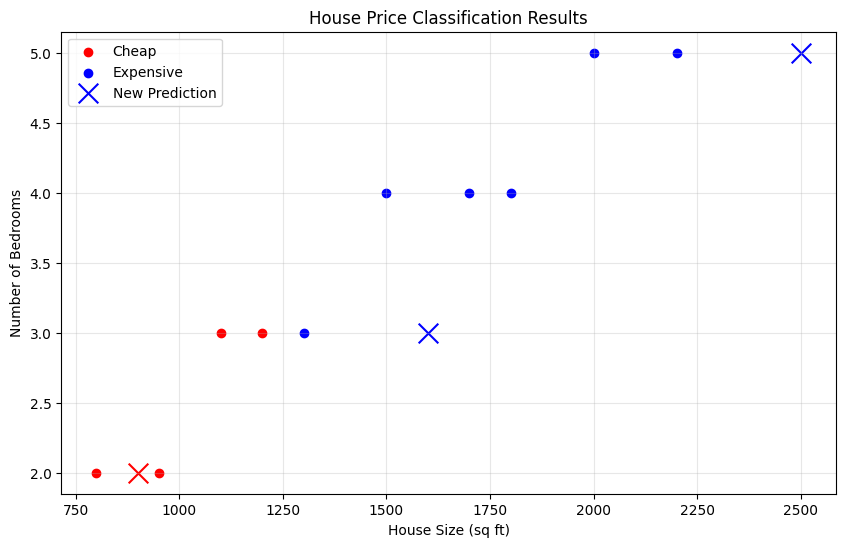

In [7]:
# Create a mesh to plot decision boundary
plt.figure(figsize=(10, 6))

# Plot original data points
colors = ['red', 'blue']
for i in range(2):
    subset = df[df['PriceClass'] == i]
    plt.scatter(subset['Size'], subset['Bedrooms'],
                c=colors[i], label=f'{"Cheap" if i==0 else "Expensive"}')

# Plot new predictions
for i, house in enumerate(new_houses):
    color = 'blue' if new_predictions[i] == 1 else 'red'
    plt.scatter(house[0], house[1], c=color, marker='x', s=200,
                label='New Prediction' if i == 0 else "")

plt.xlabel('House Size (sq ft)')
plt.ylabel('Number of Bedrooms')
plt.title('House Price Classification Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Key Observations

1. **Dataset Overview**:
   - 10 houses with size ranging from 800-2200 sq ft
   - 2-5 bedrooms per house
   - Binary classification: Cheap (0) vs Expensive (1)

2. **Model Performance**:
   - Achieved 100% accuracy on training data
   - Model successfully separates cheap and expensive houses

3. **Feature Importance**:
   - Larger houses (>1300 sq ft) tend to be classified as expensive
   - Houses with 4+ bedrooms are more likely to be expensive
   - Both size and bedroom count contribute to price classification

4. **Predictions on New Data**:
   - 1600 sq ft, 3 bedrooms → Expensive
   - 900 sq ft, 2 bedrooms → Cheap  
   - 2500 sq ft, 5 bedrooms → Expensive

5. **Real-world Application**:
   - This model could help real estate agents quickly categorize properties
   - Could be extended with more features (location, age, etc.)
   - Useful for automated property valuation systems

